> # **Ridge Regularization**
> Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a `regularization term equal to α(b^2)` is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

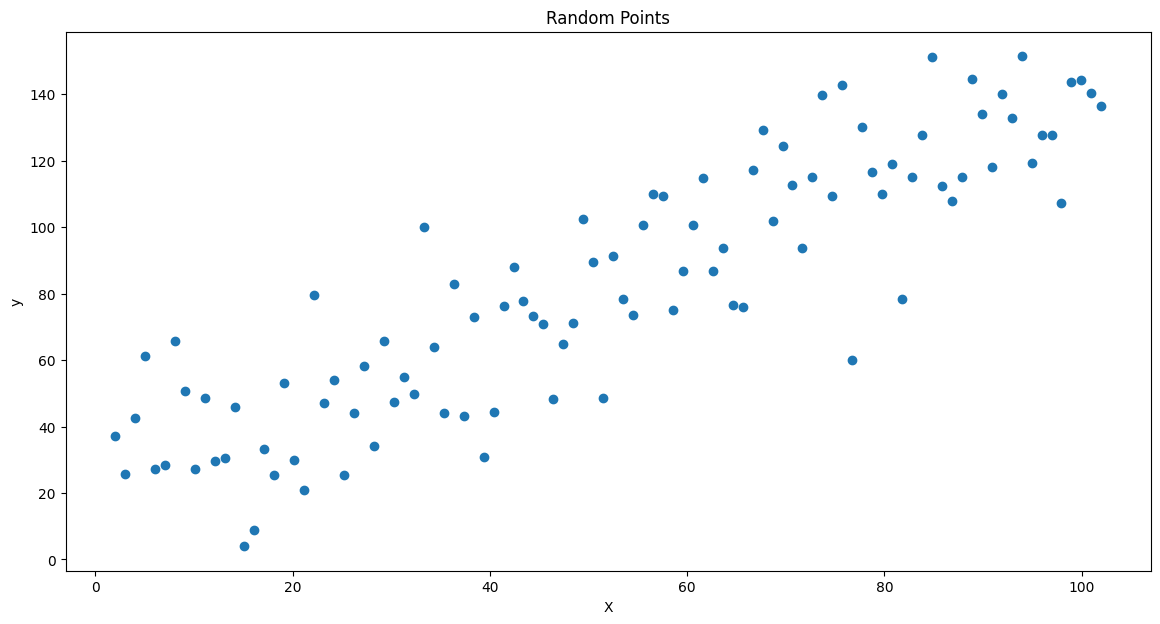

In [14]:
np.random.seed(42)
X = 2 + np.linspace(0, 100, 100)
y = (1.14 * X) + 25 + np.random.randn(100) * 20
plt.figure(figsize=(14,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Points")
plt.show()

<hr>

> ### Ridge Regularization on 2D data using `Closed Form Solution`
> Observations:
> - The Addition of l2-norm Term forces the learning algorithm not only fit the data but also keep the model weight as small as possible.
> - `Higher alpha` : `Underfitting`
> - `Lower alpha` : `Overfitting`

In [17]:
class RidgeRegularization:
    def __init__(self, alpha = 0.01) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha

    def fit(self, X_train, y_train) -> None:
        X_train = np.array(X_train).ravel()
        y_train = np.array(y_train).ravel()
        
        numerator = np.sum((y_train - y_train.mean()) * (X_train - X_train.mean()))
        denominator = np.sum((X_train - X_train.mean())**2) + self.alpha

        self.coef_ = numerator / denominator
        self.intercept_ = y_train.mean() - self.coef_ * X_train.mean()
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_,) + self.intercept_

R2 Score for alpha = 0 is  0.7804912758923284
R2 Score for alpha = 5000 is  0.778083253154522
R2 Score for alpha = 10000 is  0.7718462373705606
R2 Score for alpha = 20000 is  0.7521832102856074


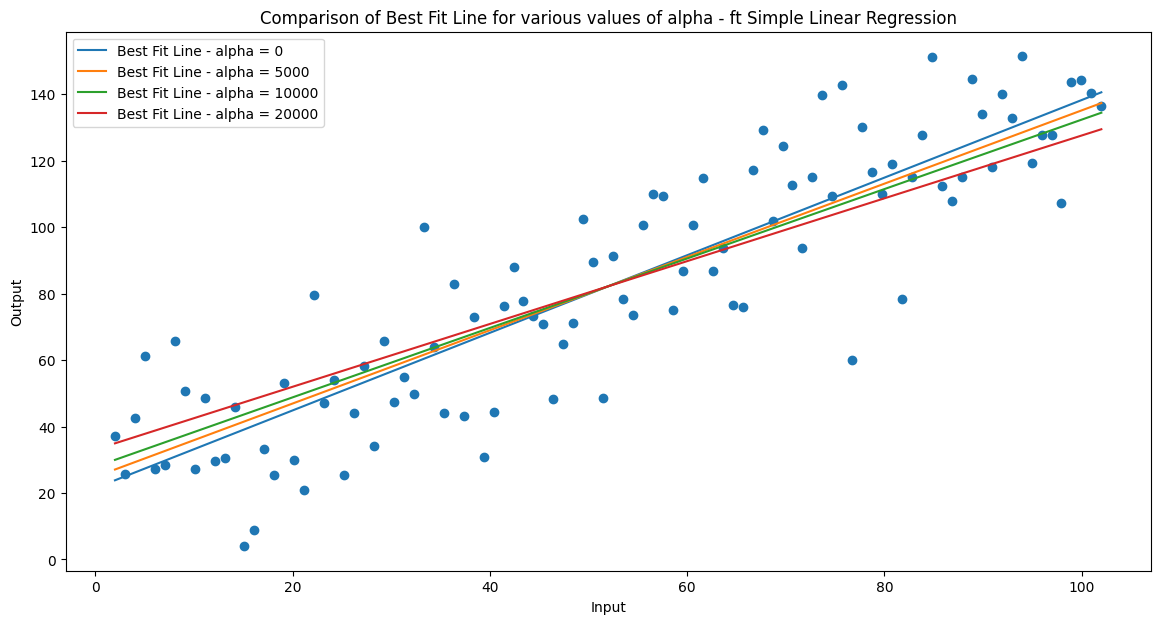

In [19]:
alphas = [0, 5000, 10000, 20000]

plt.figure(figsize=(14,7))
plt.scatter(X, y)

for alpha in alphas:
    model = RidgeRegularization(alpha)
    model.fit(X, y)

    y_pred = model.predict(X)
    print(f'R2 Score for alpha = {alpha} is ', r2_score(y, y_pred))

    plt.plot(X, y_pred, label=f'Best Fit Line - alpha = {alpha}')

plt.title("Comparison of Best Fit Line for various values of alpha - ft Simple Linear Regression")

plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()
plt.show()

<hr>

> ### Ridge Regularization on nD data using `Closed Form Solution`
> 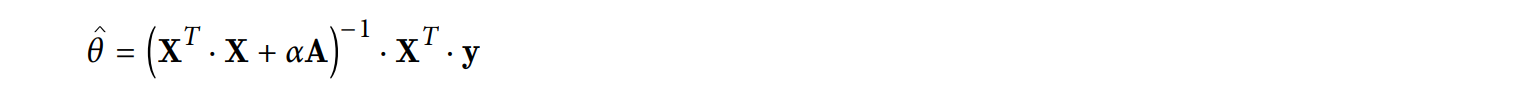
> 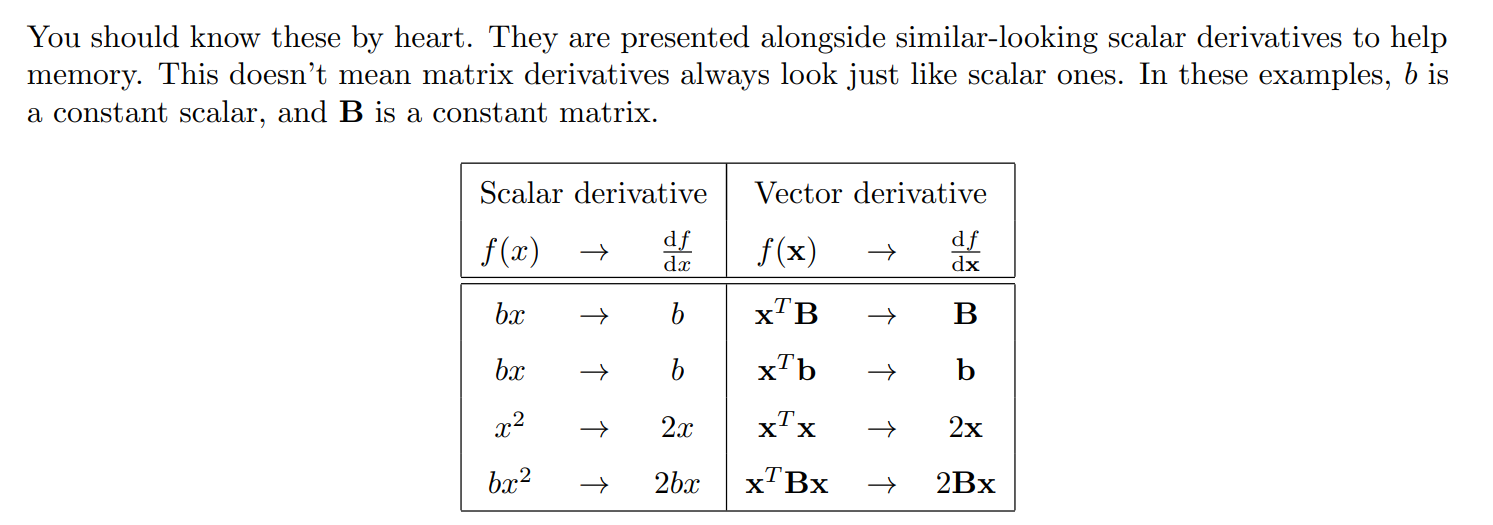

In [20]:
X, y = load_diabetes(return_X_y=True)
y = y.reshape(-1, 1)

In [32]:
class RidgeRegularizationMR:
    def __init__(self, alpha) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha
    
    def fit(self, X_train, y_train) -> None:
        # Converting to numpy array
        X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)

        # Inserting 1 to the initials of all
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Formula - OLS
        weights = np.linalg.inv(np.dot(X_train.T, X_train) - (self.alpha * np.identity(X_train.shape[1]))).dot(X_train.T).dot(y_train)

        # coef_ and intercept_
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [45]:
model = RidgeRegularizationMR(alpha=0.001)
model.fit(X, y)
print(model.coef_.ravel(), model.intercept_, sep='\n')

[ -10.56798871 -240.6537649   519.07716183  325.04220188 -893.14023104
  556.85777307  145.70739711  189.2918451   789.47918304   67.05160902]
[152.13382836]


In [46]:
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.5176821274610711


In [48]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X)

model = RidgeRegularizationMR(alpha=0.001)
model.fit(X_train, y)

y_pred = model.predict(X_train)
print(r2_score(y, y_pred))

0.5177484219352539


<hr>

> ### Ridge Regularization on nD data using `Gradient Descent`
> 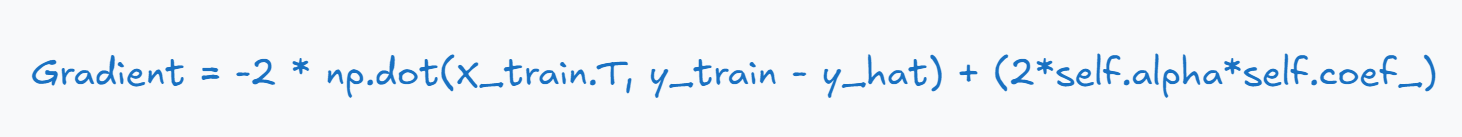
> ### BATCH GRADIENT DESCENT

In [51]:
class RidgeRegularizationGD:
    def __init__(self, learning_rate, epochs: int, alpha) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
    
    def fit(self, X_train, y_train) -> None:
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(-1, 1)

        self.coef_ = np.ones(shape=(X_train.shape[1], 1))
        self.intercept_ = 0

        for epoch in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            coef_der = -2 * np.dot(X_train.T, y_train - y_hat) + (2*self.alpha*self.coef_)
            self.coef_ = self.coef_ - self.lr * coef_der

            intercept_der = -2 * np.sum(y_train - y_hat)
            self.intercept_ -= self.lr * intercept_der
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [52]:
model = RidgeRegularizationGD(alpha=0.01, learning_rate=0.001, epochs=1000)
model.fit(X, y)
print(model.coef_.ravel(), model.intercept_, sep='\n')

[  10.71449462 -184.014057    473.0474937   295.59945603  -36.37265076
  -98.88718524 -204.73668249  130.29975367  394.22017561  122.96622492]
152.13348416289602


In [53]:
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.5091448093882993


In [59]:
model = RidgeRegularizationGD(alpha=0.01, learning_rate=0.0001, epochs=5000)
model.fit(X_train, y)

y_pred = model.predict(X_train)
print(r2_score(y, y_pred))

0.5177460950494861


<hr>

> ### STOCASTIC GRADIENT DESCENT
> 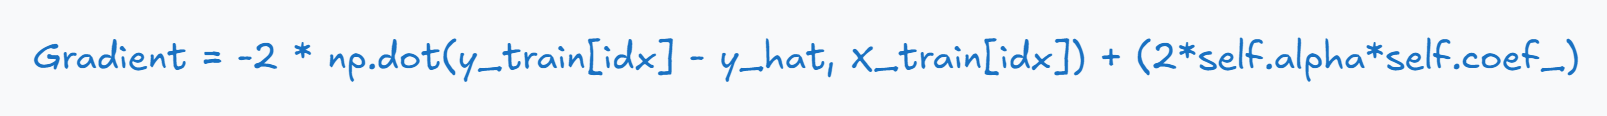
> For every iteration of record

In [64]:
class RidgeRegularizationSGD:
    def __init__(self, learning_rate, epochs: int, alpha) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha

    def learning_schedule(self, t):
        t0, t1 = 5, 50
        return t0 / (t + t1)
    
    def fit(self, X_train, y_train) -> None:
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()

        self.coef_ = np.ones(shape=(X_train.shape[1]))
        self.intercept_ = 0

        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_

                coef_der = -2 * np.dot(y_train[idx] - y_hat, X_train[idx]) + (2*self.alpha*self.coef_)
                self.coef_ = self.coef_ - self.lr * coef_der

                intercept_der = -2 * np.sum(y_train[idx] - y_hat)
                self.intercept_ -= self.learning_schedule(i) * intercept_der
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [67]:
model = RidgeRegularizationSGD(alpha=0.01, learning_rate=0.001, epochs=1000)
model.fit(X, y)
print(model.coef_.ravel(), model.intercept_, sep='\n')

[ 30.49339011 -11.13506637 139.77133242  97.91371202  25.61622221
  13.19123524 -82.24080378  77.54451312 124.67224296  73.0005408 ]
151.5577795580832


In [68]:
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.295365406995026


In [75]:
model = RidgeRegularizationSGD(alpha=0.01, learning_rate=0.005, epochs=500)
model.fit(X_train, y)

y_pred = model.predict(X_train)
print(r2_score(y, y_pred))

0.4885772318928908


In [78]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(
    penalty='l2',
    max_iter=10000,
    alpha=0.01,
    eta0=0.001
)

model.fit(X_train, y.ravel())

y_pred = model.predict(X_train)
print(r2_score(y, y_pred))

0.5144108269332139


<hr>

> ### MINI-BATCH GRADIENT DESCENT

In [97]:
class RidgeRegularizationMBGD:
    def __init__(self, lr=0.0001, epochs=100, batch_size=100, alpha=0.01) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    
    def fit(self, X_train, y_train) -> None:
        # Converting to numpy array
        X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)

        # Random Initilization
        self.coef_ = np.ones(shape=(X_train.shape[1], 1))
        self.intercept_ = 0

        # Iterations
        for epoch in range(self.epochs):
            for i in range(int(X_train.shape[0]/self.batch_size)):
                # Random subset
                idx = np.random.randint(0, X_train.shape[0], self.batch_size)
                X_set, y_set = X_train[idx], y_train[idx]

                # Calculating y_hat
                y_hat = np.dot(X_set, self.coef_) + self.intercept_

                # Applying formula
                gradient = (-2/X_train.shape[0])*np.dot(X_set.T, y_set - y_hat) # Since we have reshaped our y_train from 1d to 2d we have to transpost X_train
                self.coef_ -= self.lr * gradient

                gradient = (-2/X_train.shape[0])*np.sum(y_set - y_hat)
                self.intercept_ -= self.lr * gradient
                
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [99]:
model = RidgeRegularizationMBGD(lr=0.01, epochs=1000, batch_size=50, alpha=0.01)
model.fit(X, y)
print(model.coef_, model.intercept_)

[[ 12.19514192]
 [  2.79703686]
 [ 37.74952479]
 [ 28.20855197]
 [ 13.08598096]
 [ 10.54813086]
 [-23.23938198]
 [ 26.93067809]
 [ 35.94900769]
 [ 24.18716183]] 152.05391074395843


In [100]:
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.10571768759259692


In [101]:
model = RidgeRegularizationMBGD(lr=0.01, epochs=1000, batch_size=50, alpha=0.01)
model.fit(X_train, y)

y_pred = model.predict(X_train)
print(r2_score(y, y_pred))

0.514886945117885


<hr>

> ### Ridge - sklearn class
> This class uses `Clased Form Solution` approach, so it does not have `penalty` hyperparameter
> `Hyperparameters`:
> - alpha
> - fit_intercept
> - tol - tolerance of coef
> - max_iter = GD

In [102]:
model = Ridge(solver='sag', alpha=0.01, fit_intercept=True, tol=0.0001, random_state=42, max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.5166263963523758


> `RidgeCV` - Automatically tunes parameter using `cross-val-score`

In [103]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))

0.512561990274251


<hr>

> ### Ridge Regularization on `Polynomial Data`

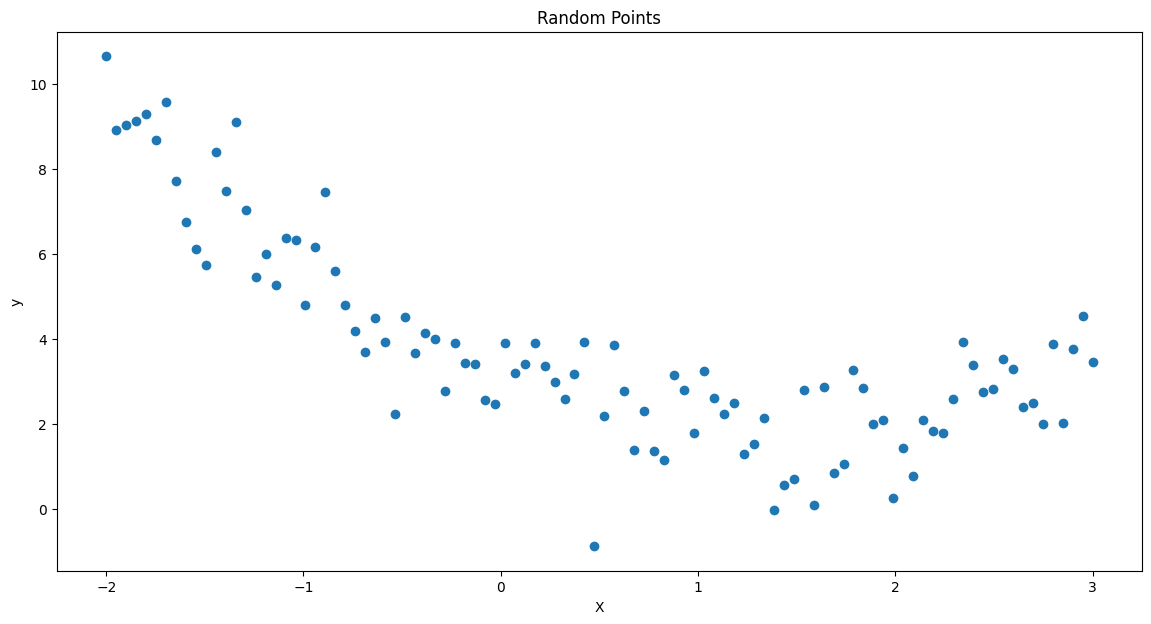

In [110]:
m = 100
x1 = 5 * np.linspace(0, 1, m) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m)

plt.figure(figsize=(14,7))
plt.scatter(x1, x2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Points")
plt.show()

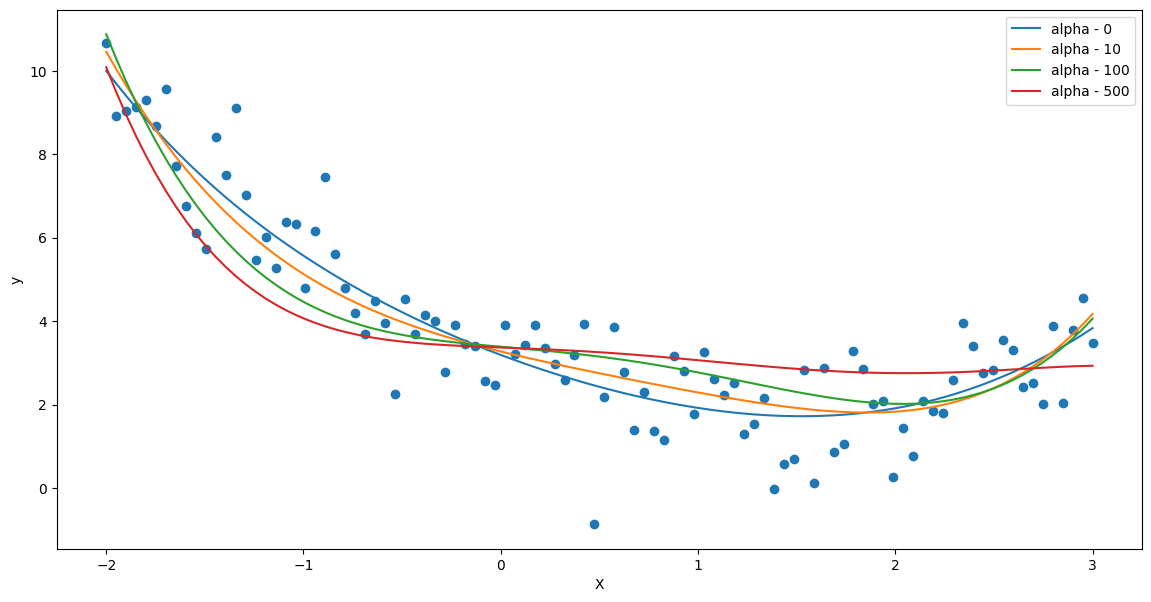

In [117]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=5)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1.reshape(-1, 1), x2)
    return model.predict(x1.reshape(-1, 1))

plt.figure(figsize=(14,7))
plt.scatter(x1, x2)

alphas = [0, 10, 100, 500]

for alpha in alphas:
    pred = get_preds_ridge(x1, x2, alpha)
    plt.plot(x1, pred, label = f"alpha - {alpha}")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()